# Data Pre-Processing - Gradient Boosting Classifier Model

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/workspaces/CS_Group07_StudentDepressionDetection/notebooks/menura-gradient_boosting_classifier/cleaned_student_depression(GBC-model).csv")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df.head()

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal Thoughts,Study_Hours,Financial_Stress,Mental Illness History,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Feature Engineering

### 1) Overall Stress

In [13]:
if 'Academic_Pressure' in df.columns and 'Study_Hours' in df.columns and 'Financial_Stress' in df.columns and 'Overall_Stress' not in df.columns:
    df['Overall_Stress'] = df['Academic_Pressure'] + df['Study_Hours'] + df['Financial_Stress']

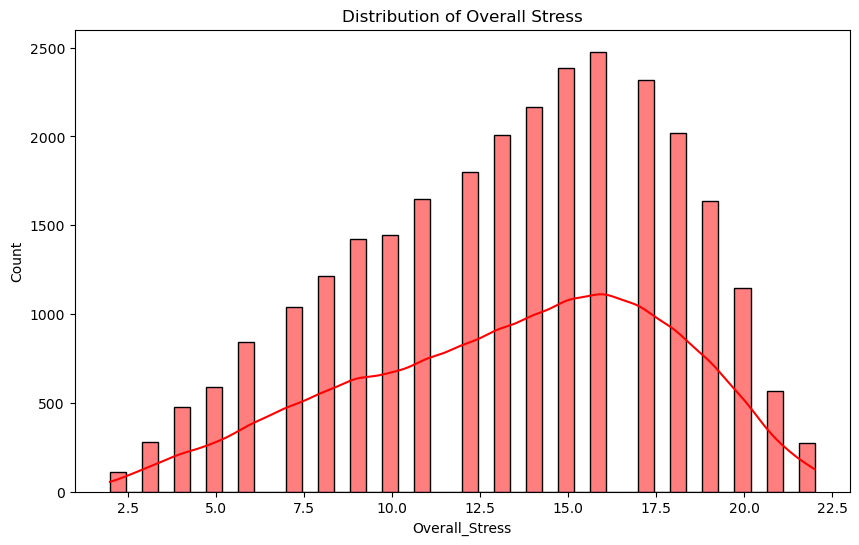

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall_Stress'], kde=True, color='red')
plt.title("Distribution of Overall Stress")
plt.show()

### 2) Age Groups

In [17]:
if 'Age' in df.columns and 'Age_Group' not in df.columns:
    df['Age_Group'] = pd.cut(df['Age'],
                             bins=[0, 18, 25, 35, 100],
                             labels=['Teen', 'Young Adult', 'Adult', 'Senior']).astype(str)

<Axes: xlabel='Age_Group', ylabel='Count'>

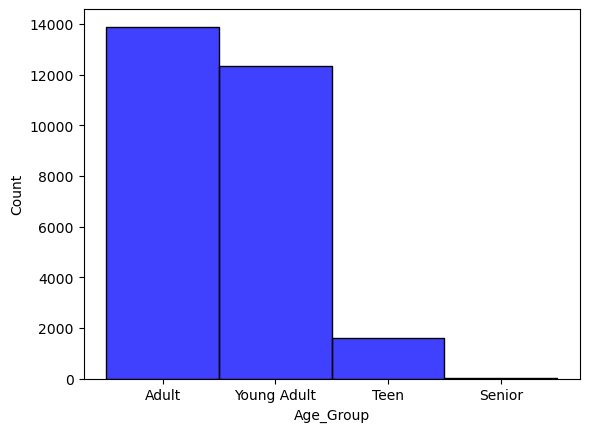

In [23]:
sns.histplot(df['Age_Group'], color='blue', bins=20)

### 3) Sleep Duration Mapping

In [24]:
sleep_map = {
    "Less than 5 hours": 1,
    "5-6 hours": 2,
    "7-8 hours": 3,
    "More than 8 hours": 2  # not necessary - not better
}

### 4) Dietary Habit Mapping to a Score

In [25]:
diet_map = {
    "Unhealthy": 1,
    "Moderate": 2,
    "Healthy": 3
}

### 5) Lifestyle 

In [26]:
df['Sleep_Score'] = df['Sleep_Duration'].map(sleep_map)
df['Diet_Score'] = df['Dietary_Habits'].map(diet_map)

if 'Sleep_Score' in df.columns and 'Diet_Score' in df.columns and 'Lifestyle_Score' not in df.columns:
    df['Lifestyle_Score'] = (df['Sleep_Score'] + df['Diet_Score']) / 2


<Axes: xlabel='Lifestyle_Score', ylabel='Count'>

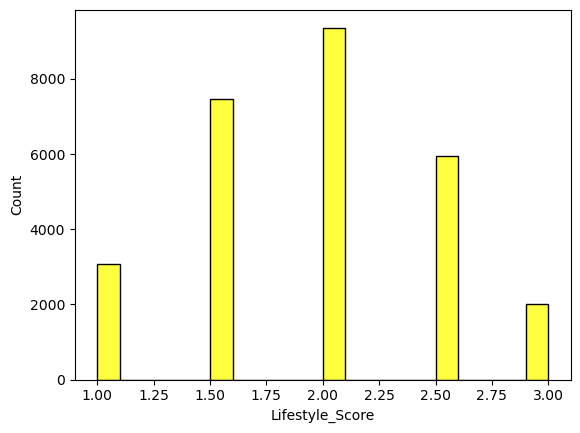

In [30]:
sns.histplot(df['Lifestyle_Score'], color='yellow', bins=20)

## Data Cleaning After FEature Engineering

### Remove Null Values

In [39]:
df.isnull().sum()

Gender                     0
Age                        0
Academic_Pressure          0
CGPA                       0
Study_Satisfaction         0
Sleep_Duration             0
Dietary_Habits             0
Degree                     0
Suicidal Thoughts          0
Study_Hours                0
Financial_Stress           0
Mental Illness History     0
Depression                 0
Overall_Stress             0
Age_Group                  0
Sleep_Score               18
Diet_Score                12
Lifestyle_Score           30
dtype: int64

In [40]:
df = df.dropna()
df.isnull().sum()

Gender                    0
Age                       0
Academic_Pressure         0
CGPA                      0
Study_Satisfaction        0
Sleep_Duration            0
Dietary_Habits            0
Degree                    0
Suicidal Thoughts         0
Study_Hours               0
Financial_Stress          0
Mental Illness History    0
Depression                0
Overall_Stress            0
Age_Group                 0
Sleep_Score               0
Diet_Score                0
Lifestyle_Score           0
dtype: int64

### Check Duplicates

In [42]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


## One-Hot Encoding

In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df.head()

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal Thoughts,Study_Hours,Financial_Stress,Mental Illness History,Depression,Overall_Stress,Age_Group,Sleep_Score,Diet_Score,Lifestyle_Score
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,9.0,Adult,2.0,3.0,2.5
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,7.0,Young Adult,2.0,2.0,2.0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,13.0,Adult,1.0,3.0,2.0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,12.0,Adult,3.0,2.0,2.5
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,6.0,Young Adult,2.0,2.0,2.0


In [44]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,Age,Academic_Pressure,CGPA,Study_Satisfaction,Study_Hours,Financial_Stress,Depression,Overall_Stress,Sleep_Score,Diet_Score,...,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Suicidal Thoughts_Yes,Mental Illness History_Yes,Age_Group_Senior,Age_Group_Teen,Age_Group_Young Adult
0,33.0,5.0,8.97,2.0,3.0,1.0,1,9.0,2.0,3.0,...,False,False,False,False,False,True,False,False,False,False
1,24.0,2.0,5.90,5.0,3.0,2.0,0,7.0,2.0,2.0,...,False,False,False,False,False,False,True,False,False,True
2,31.0,3.0,7.03,5.0,9.0,1.0,0,13.0,1.0,3.0,...,False,False,False,False,False,False,True,False,False,False
3,28.0,3.0,5.59,2.0,4.0,5.0,1,12.0,3.0,2.0,...,False,False,False,False,False,True,True,False,False,False
4,25.0,4.0,8.13,3.0,1.0,1.0,0,6.0,2.0,2.0,...,False,False,False,False,False,True,False,False,False,True


## Scale Numerical Features

In [45]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,Age,Academic_Pressure,CGPA,Study_Satisfaction,Study_Hours,Financial_Stress,Depression,Overall_Stress,Sleep_Score,Diet_Score,...,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Suicidal Thoughts_Yes,Mental Illness History_Yes,Age_Group_Senior,Age_Group_Teen,Age_Group_Young Adult
0,1.463407,1.345562,0.893294,-0.693131,-1.122015,-1.488886,0.841926,-0.990062,0.046215,1.375012,...,False,False,False,False,False,True,False,False,False,False
1,-0.370889,-0.825572,-1.194056,1.511052,-1.122015,-0.793084,-1.187753,-1.436091,0.046215,0.120178,...,False,False,False,False,False,False,True,False,False,True
2,1.055786,-0.101861,-0.425748,1.511052,0.496708,-1.488886,-1.187753,-0.098004,-1.289707,1.375012,...,False,False,False,False,False,False,True,False,False,False
3,0.444354,-0.101861,-1.404831,-0.693131,-0.852228,1.294320,0.841926,-0.321018,1.382137,0.120178,...,False,False,False,False,False,True,True,False,False,False
4,-0.167078,0.621851,0.322162,0.041597,-1.661590,-1.488886,-1.187753,-1.659105,0.046215,0.120178,...,False,False,False,False,False,True,False,False,False,True


## Split Features (X) and Target (y)

In [46]:

X = df_encoded.drop("Depression", axis=1) 
y = df_encoded["Depression"]


## Split - Training & Testing sets (80-20 split)

In [47]:
y = y.astype(int) 

In [48]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE to training set - Balance the data set

In [49]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Save Pre-processed Data Set

In [50]:
df_encoded.to_csv("preprocessed_student_depression(GBC-model).csv", index=False)